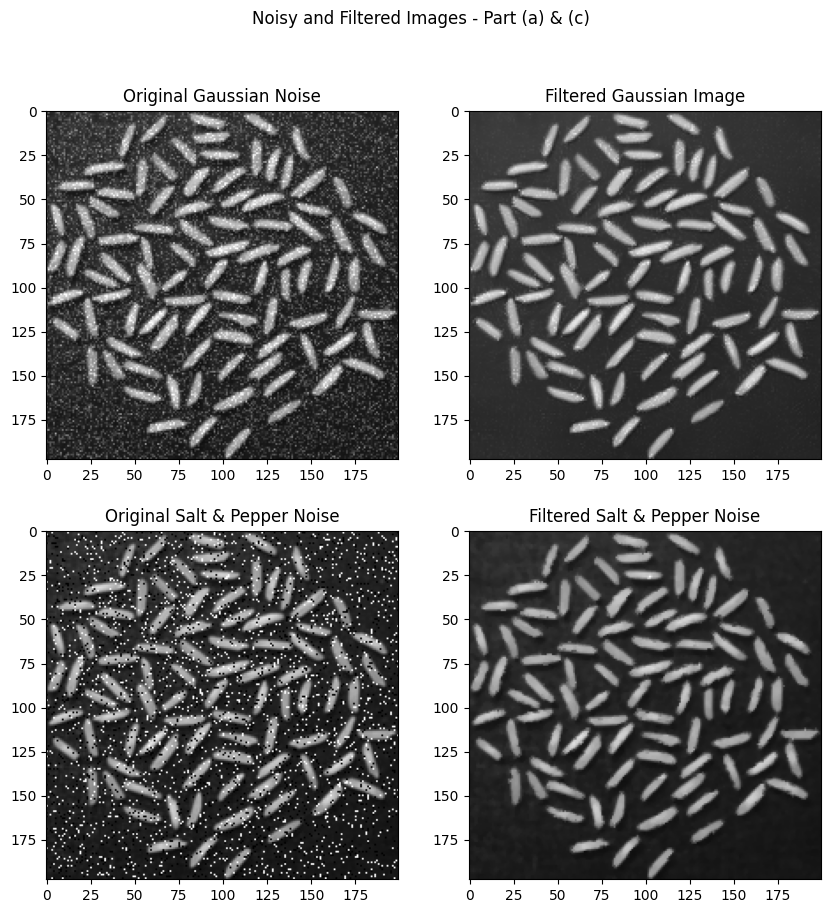

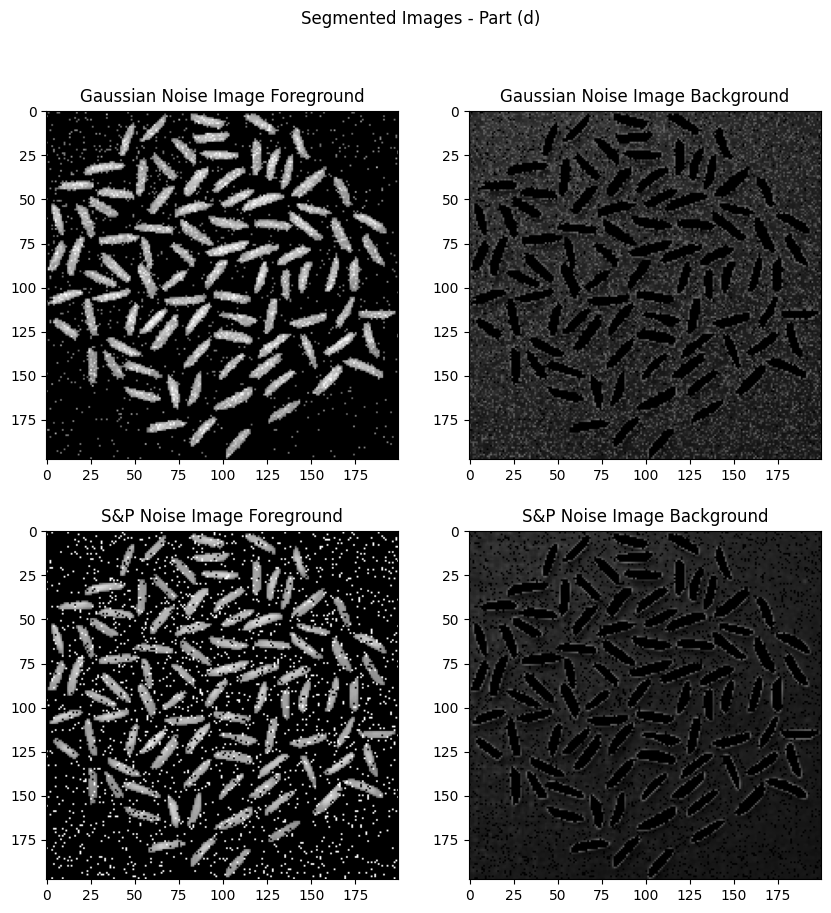

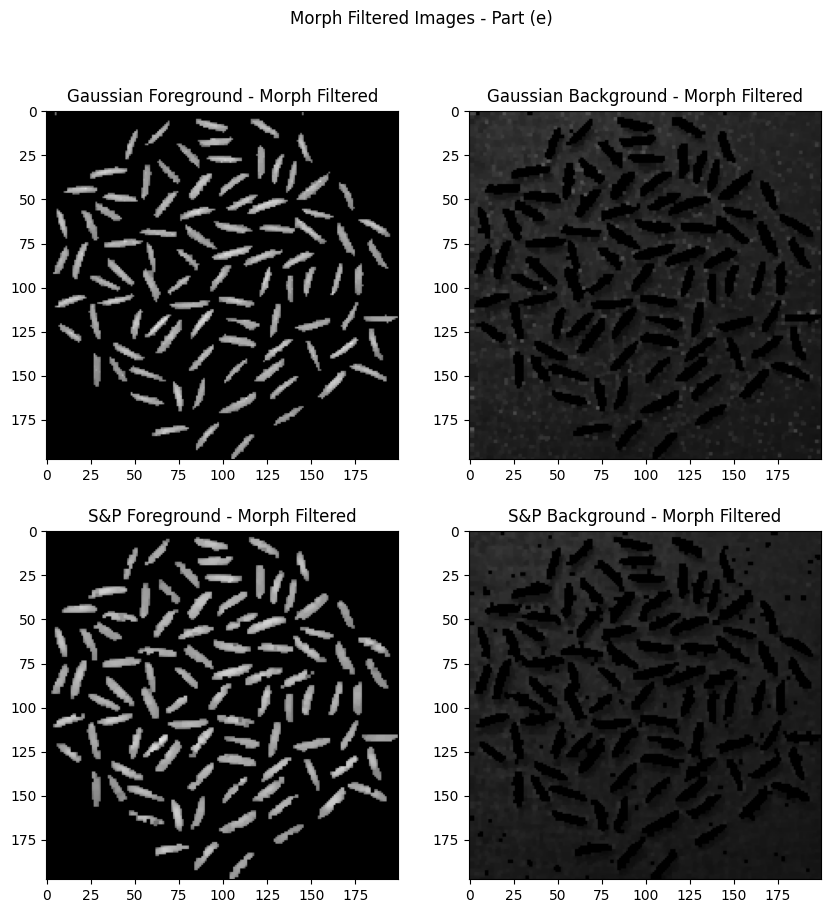

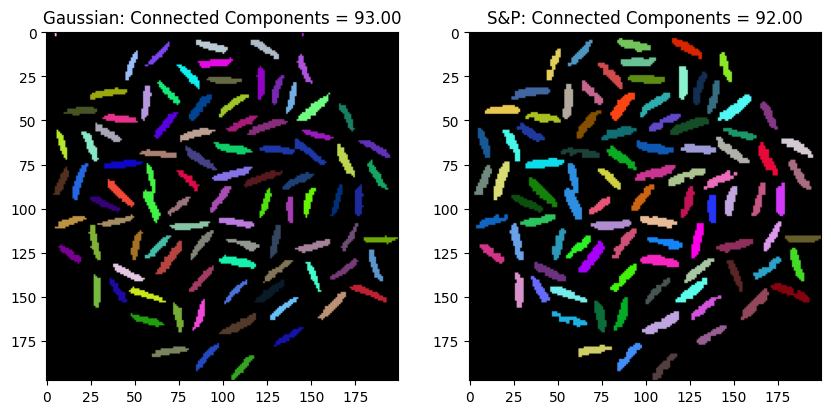

In [39]:
#Question 5 - Noise Filtering

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/rice_gaussian_noise.png')
assert img is not None
ims = cv.imread('images/rice_salt_pepper_noise.png')
assert ims is not None

#Part (a)
#Filtering Gaussian Noise using fast non-local means denoising
img_f = cv.fastNlMeansDenoising(img, None, 25, 5, 20)

#Part (c)
# Filtering Salt & Pepper Noise using median Blurring
ims_f = cv.medianBlur(ims, 3, None)

#Part(d)
#Applying Otsu's method to segment the image
def seg(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, binary =  cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    binary_inv = cv.bitwise_not(binary)
    fore = cv.bitwise_and(img, img, mask= binary)
    back = cv.bitwise_and(img, img, mask=binary_inv)
    return fore, back

foreg, backg = seg(img)
fores, backs = seg(ims)

#Part (e)
#Applying morphological transformations to filter image
kernel = np.ones((2,2),np.uint8)
def morph(img):
    #Using opening (erosion -> dilation) to remove noise
    open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    #Using closing (dilation -> erosion) to close small holes in objects
    close = cv.morphologyEx(open, cv.MORPH_CLOSE, kernel)
    return close

foreg_m = morph(foreg)
backg_m = morph(backg)
fores_m = morph(fores)
backs_m = morph(backs)

#Using erosion on the Gaussian image as some rice grains remain connected
foreg_e = cv.erode(foreg_m, kernel, iterations= 1)

#Part (f)
#Using connected components to count the number of rice grains
def con_com (img):
    img_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    number, labels = cv.connectedComponents(img_g)

    # Create a random color map for visualization
    colors = np.random.randint(0, 255, size=(number, 3), dtype=np.uint8)
    vis_image = np.zeros((img_g.shape[0], img_g.shape[1], 3), dtype=np.uint8)
    for label in range(1, number):
        vis_image[labels == label] = colors[label]
    
    return number, vis_image

num_g, im_g = con_com(foreg_e)
num_s, im_s = con_com(fores_m)

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0 , 0].imshow(img)
ax[0 , 0].set_title('Original Gaussian Noise')
ax[0 , 1].imshow(img_f)
ax[0 , 1].set_title('Filtered Gaussian Image')
ax[1 , 0].imshow(ims)
ax[1 , 0].set_title('Original Salt & Pepper Noise')
ax[1 , 1].imshow(ims_f)
ax[1 , 1].set_title('Filtered Salt & Pepper Noise')
fig.suptitle('Noisy and Filtered Images - Part (a) & (c)')
plt.show()

fig2, ax2 = plt.subplots(2,2, figsize = (10,10))
ax2[0 , 0].imshow(foreg)
ax2[0 , 0].set_title('Gaussian Noise Image Foreground')
ax2[0 , 1].imshow(backg)
ax2[0 , 1].set_title('Gaussian Noise Image Background')
ax2[1 , 0].imshow(fores)
ax2[1 , 0].set_title('S&P Noise Image Foreground')
ax2[1 , 1].imshow(backs)
ax2[1 , 1].set_title('S&P Noise Image Background')
fig2.suptitle('Segmented Images - Part (d)')
plt.show()

fig3, ax3 = plt.subplots(2,2, figsize = (10,10))
ax3[0 , 0].imshow(foreg_e)
ax3[0 , 0].set_title('Gaussian Foreground - Morph Filtered')
ax3[0 , 1].imshow(backg_m)
ax3[0 , 1].set_title('Gaussian Background - Morph Filtered')
ax3[1 , 0].imshow(fores_m)
ax3[1 , 0].set_title('S&P Foreground - Morph Filtered')
ax3[1 , 1].imshow(backs_m)
ax3[1 , 1].set_title('S&P Background - Morph Filtered')
fig3.suptitle('Morph Filtered Images - Part (e)')
plt.show()

fig4, ax4 = plt.subplots(1,2, figsize = (10,10))
ax4[0].imshow(im_g)
ax4[0].set_title('Gaussian: Connected Components = {:.2f}'.format(num_g))
ax4[1].imshow(im_s)
ax4[1].set_title('S&P: Connected Components = {:.2f}'.format(num_s))
plt.show()